# Handwritten Digit Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Using data from keras.datasets

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Training Data Contain 60000

In [3]:
len(x_train)

60000

### Test Data Contain 10000

In [4]:
len(x_test)

10000

### Image Size is 28x28

In [5]:
x_train[0].shape

(28, 28)

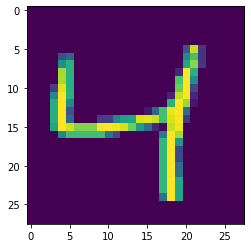

In [6]:
plt.imshow(x_train[2])

In [7]:
y_train[2]

4

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create Neural Network with 1 hidden layer

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.4461 - accuracy: 0.8773: 0s - loss: 0.4504 - accuracy: 0.
Epoch 2/10
1875/1875 [==============================] - 2s 880us/step - loss: 0.1301 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.0854 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 2s 914us/step - loss: 0.0632 - accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0484 - accuracy: 0.9850
Epoch 6/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.0393 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 923us/step - loss: 0.0303 - accuracy: 0.99100s - l
Epoch 8/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0253 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0201 - accuracy: 0.9944
Epoch 10/10
1875/1875 [=====

### Testing Model in Testing data

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 730us/step - loss: 0.0822 - accuracy: 0.9782


[0.08219881355762482, 0.9782000184059143]

In [13]:
y_predicted = model.predict(x_test)
y_predicted[0]

array([3.2690167e-04, 1.8600259e-07, 5.4633087e-01, 9.6609175e-01,
       1.0934690e-08, 4.8723205e-06, 1.0798190e-08, 9.9999958e-01,
       2.9463172e-03, 6.4355254e-01], dtype=float32)

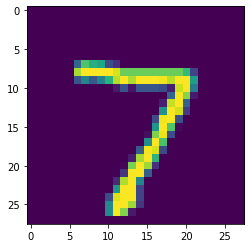

In [14]:
plt.imshow(x_test[0])

### Create Confusion Matrix

In [15]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    1,    2,    1,    4,    0],
       [   0, 1122,    3,    4,    0,    0,    1,    2,    3,    0],
       [   5,    2, 1004,    3,    2,    0,    1,    6,    9,    0],
       [   0,    0,    2,  993,    0,    3,    0,    5,    1,    6],
       [   4,    0,    3,    1,  954,    1,    3,    2,    1,   13],
       [   3,    0,    0,   14,    0,  860,    2,    2,    8,    3],
       [   6,    3,    1,    2,    1,    5,  937,    1,    2,    0],
       [   1,    1,    7,    1,    0,    0,    0, 1009,    2,    7],
       [   4,    0,    3,    8,    3,    1,    1,    3,  946,    5],
       [   4,    2,    0,    4,    5,    2,    0,    4,    1,  987]])>

Text(69.0, 0.5, 'Truth')

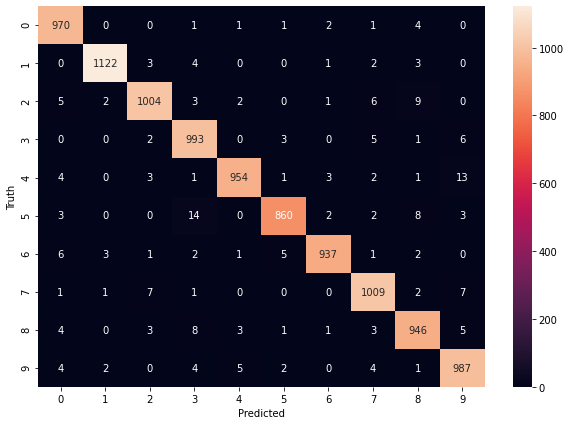

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')